# Aula 21 lab reg linear em python

In [13]:
from numpy import *
'''
class LinearRegression(object):
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.__correlatiopn_coeficient = self.__correlacao()
    self.__inclination = self.__inclinacao()
    self.__intercept = self.__interceptacao()

  def __correlacao(self):
    covariacao = cov(self.x, self.y, bias = True)[0][1]
    variancia_x = var(self.x)
    variancia_y = var(self.y)
    return covariacao/sqrt(variancia_x * variancia_y)

  def __inclinacao(self)->float:
    stdx = std(self.x)
    stdy = std(self.y)
    return self.__correlatiopn_coeficient * (stdy/stdx)

  def __interceptacao(self):
    mediax = (float) mean(self.x)
    mediay = (float) mean(self.y)
    return mediay - (mediax * self.__inclinacao)

  def previsao(self, valor):
    return self.__intercept + (self.__inclination * valor)
'''
class LinearRegression:
  def __init__(self, x, y)->None:
    self.x = x
    self.y = y
    self.__correlation_coefficient = self.__correlacao()
    self.__inclination = self.__inclinacao()
    self.__intercept = self.__interceptacao()

  def __correlacao(self):
    covariacao = cov(self.x, self.y, bias = True)[0][1]
    variancia_x = var(self.x)
    variancia_y = var(self.y)
    return covariacao/sqrt(variancia_x * variancia_y)

  def __inclinacao(self):
    stdx = std(self.x)
    stdy = std(self.y)
    return self.__correlation_coefficient * (stdy/stdx)

  def __interceptacao(self):
    mediax = mean(self.x)
    mediay = mean(self.y)
    return mediay - mediax * self.__inclination

  def previsao(self, valor):
    return self.__intercept + self.__inclination * valor

In [14]:
x = array([1,2,3,4,5])
y = array([2,4,6,8,10])

lr = LinearRegression(x,y)
previsao = lr.previsao(6)

print(previsao)

12.0


# Aula 22 -> Refazendo

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sn

In [17]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [29]:
import copy as cp
base.head(5)
obj_cp = cp.deepcopy(base)
obj_cp.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [33]:
obj_cp = obj_cp.drop(['Unnamed: 0'], axis = 1)
obj_cp.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

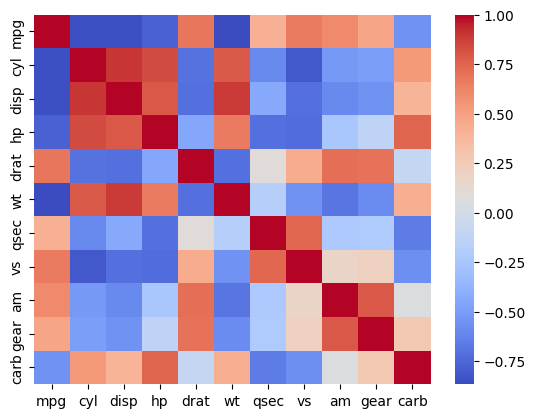

In [36]:
corr = obj_cp.corr()
sn.heatmap(corr, cmap = 'coolwarm', annot = False, fmt = '.2f')

<Axes: >

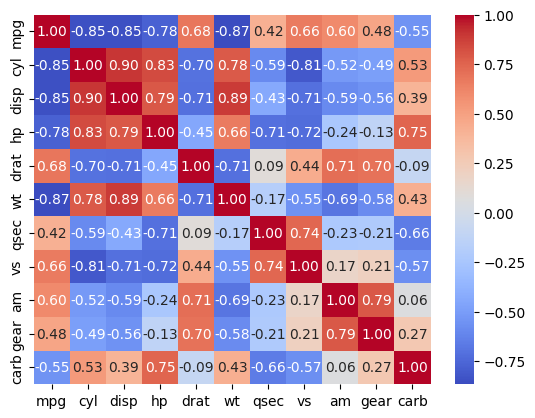

In [38]:
sn.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f')

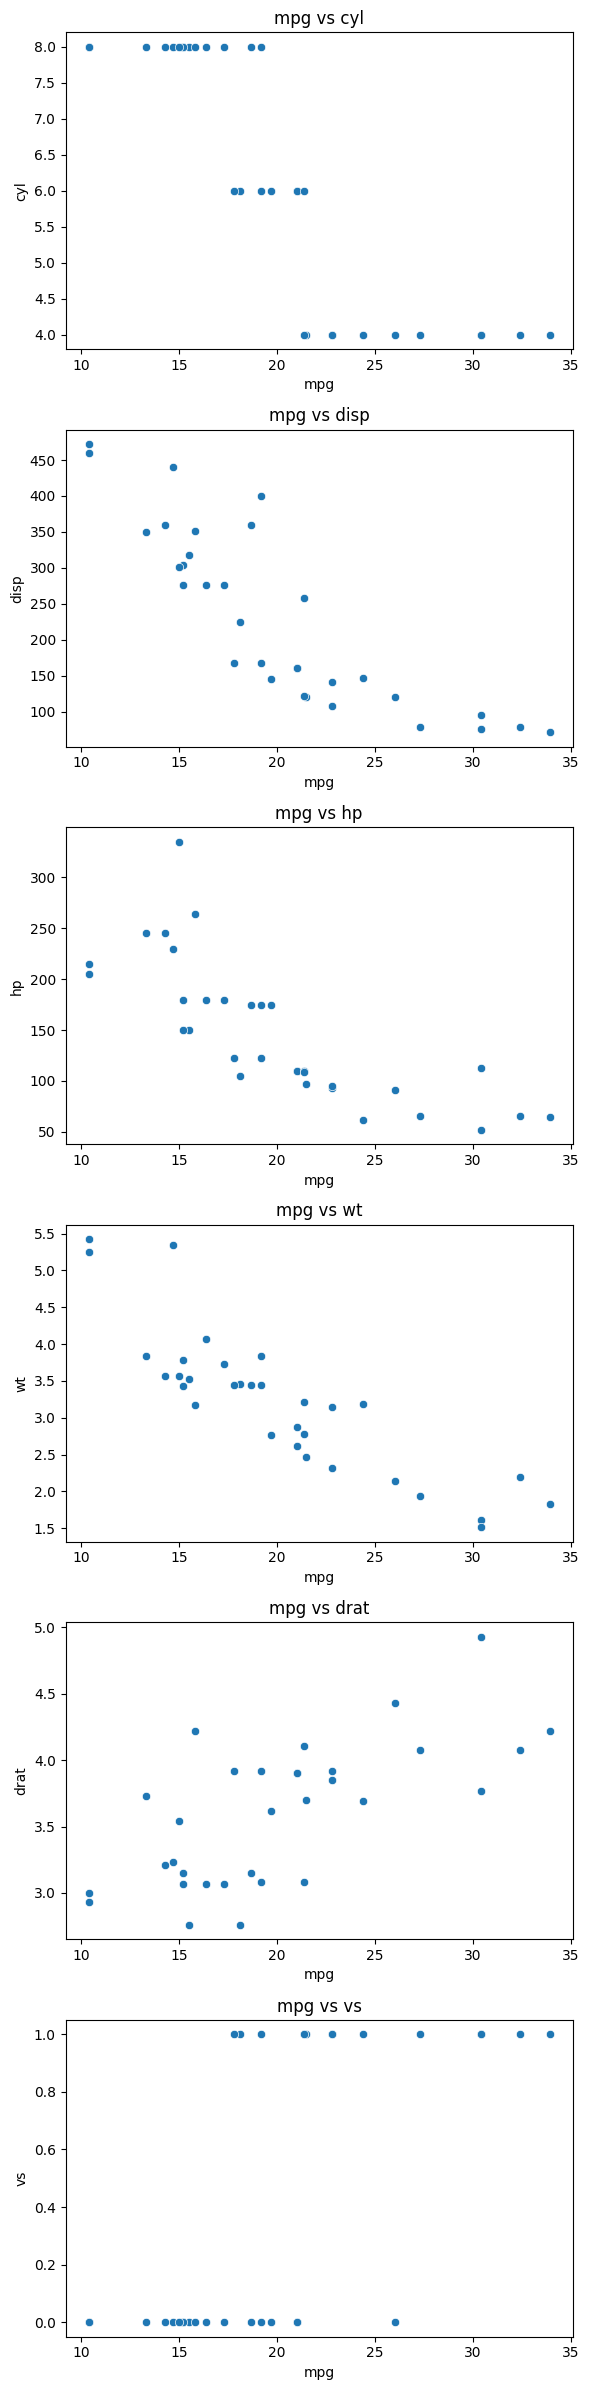

In [41]:
column_pairs = [('mpg','cyl'),('mpg','disp'),('mpg','hp'),('mpg','wt'),('mpg','drat'),('mpg','vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows = n_plots, ncols = 1, figsize = (6,4 * n_plots))

for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sn.scatterplot(x=x_col, y=y_col, data = base, ax = axes[i])
  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

# Aula 23 -> Lab Reg Linear 03

In [42]:
#aic 156.6 ; bic 162.5
modelo = sm.ols(formula = 'mpg ~ wt + disp + hp', data = base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           8.65e-11
Time:                        11:48:22   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

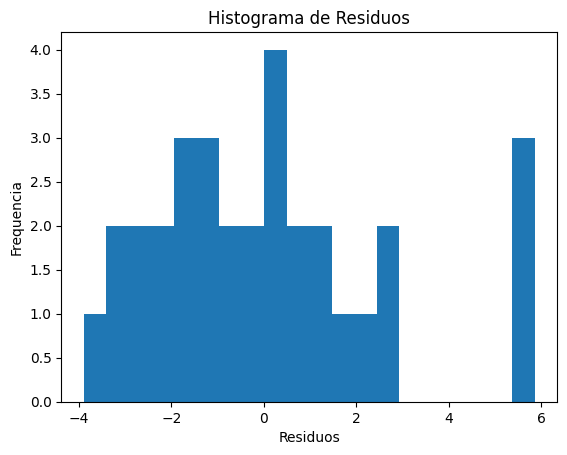

In [44]:
residuos = modelo.resid
plt.hist(residuos, bins = 20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

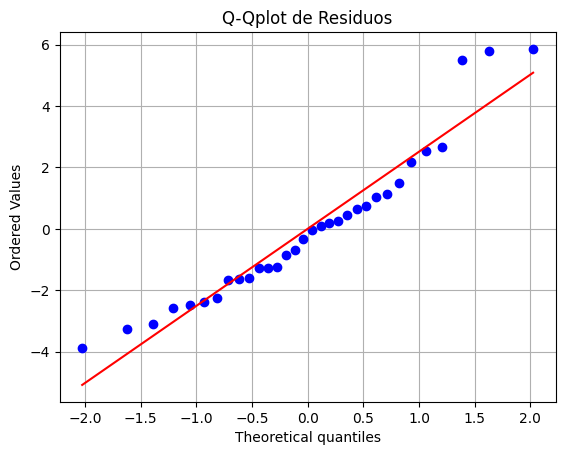

In [45]:
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title("Q-Qplot de Residuos")
plt.grid(True)
plt.show()

In [46]:
#teste de hipotese --> Ho: dados norm. distribuidos
# p <= 0.05 ---> rejeito a hipo nula
# p > 0.05 ---> nao posso rejeitar Ho
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk statistica: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statistica: 0.927, p-value: 0.033


## Refazendo com outras variaveis

In [50]:
modelo2 = sm.ols(formula = 'mpg ~ disp + cyl', data = base)
modelo2 = modelo2.fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.06e-09
Time:                        11:58:58   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

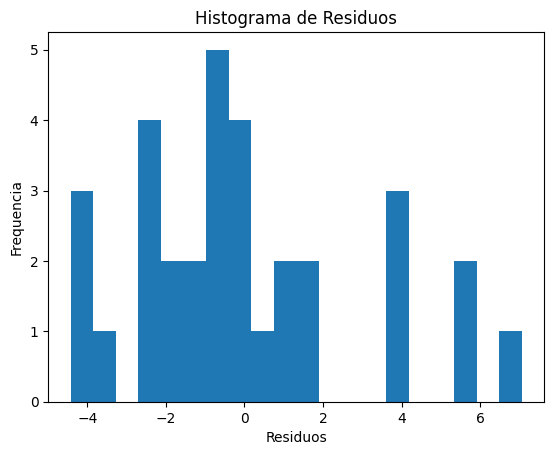

In [53]:
residuos2 = modelo2.resid
plt.hist(residuos, bins = 20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

In [54]:
#teste de hipotese --> Ho: dados norm. distribuidos
# p <= 0.05 ---> rejeito a hipo nula
# p > 0.05 ---> nao posso rejeitar Ho
stat, pval = stats.shapiro(residuos2)
print(f'Shapiro-Wilk statistica: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk statistica: 0.942, p-value: 0.085


# Pode refazer esse processo varias vezes com diff variaveis da reltaçao/tabela

# Aulas 24-25-26 Naive Bayes

In [ ]:
#Bayes --> usar os resultados dos dados historicos para criar um modelo de ML [jogar
# uma moeda infinitamente];
#eventos seqenciais --> a ocorrencia de um altera a chance de ocorrencia doutro
#prob(A|dado que B ocorreu/nao ocorreu)--> modelo debayes ignora a influencia de B

#a influencia eh indep dos atributos da classe


